# Лабараторная работа 1.1
## Экспериментальная проверка уравнения Эйнштейна для фотоэффекта
Фотоэффект – испускание электронов фотокатодом, облучаемых светом хорошо объясняется фотонной теорией света: фотон с энергией $\hbar \omega$ выбивает электрон из поверхности металла и сообщает электрону кинетическую энергию.
$$\hbar \omega = W + E_{max}$$
* $W$ работа выхода электрона из катода
* $E_{max}$ max кинетическая энергия электрона после выхода из фотокатода


In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math as math
import sys

### Шаг 1
Построим график калибровки барабана монохроматора по спектру неоновой лампы

In [2]:
graduation = pd.read_csv("graduation.csv")

In [3]:
graduation

,N линии,"λ, нм",°
0,15,614.3,2297
1,16,609.6,2276
2,17,607.4,2268
3,18,603.0,2249
4,19,597.6,2225
5,20,594.5,2202
6,21,588.2,2176
7,22,585.2,2159


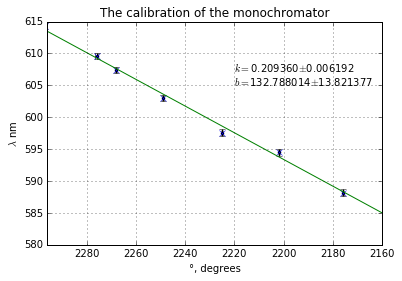

In [4]:
gradnp = graduation.values

plt.figure(1)

# calculate polynomial
x = gradnp.T[2]
y = gradnp.T[1]
coef,cov = np.polyfit(x, y, 1, cov=True)
func = np.poly1d(coef)
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]
xerr = np.array([0.5 for i in np.arange(x.shape[0])])
yerr = np.array([0.5 for i in np.arange(y.shape[0])])

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = func(x_new)

#sugar
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='k.')
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.xlabel(u'°, degrees')
plt.ylabel(u'$\lambda$ nm')
plt.title(u'The calibration of the monochromator')
plt.grid(True)

#plot
plt.plot(x,y,'x', x_new, y_new)
plt.text(2220,605,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))  #+\n+'b=$%f$\pm$%f'%(b,berr))
plt.show()

Благодаря вычисленной функции можем выяснить длины волн, которых не хватало, а именно длин волн при 2100 и 2180 градусах.

In [5]:
func(2100)

572.44415141624916

In [6]:
func(2180)

589.19295663830303

In [7]:
lambda603 = pd.read_csv("603lambda.csv")
lambda589 = pd.read_csv("2180gradlambda.csv")
lambda585 = pd.read_csv("585.2lambda.csv")
lambda572 = pd.read_csv("2100gradlambda.csv")

При построении графиков также стоит учесть, что при закрытых щелях вольтметр показывал ненулевое напряжение в 0.07

In [8]:
tensions = [[],[],[]]
cspeed = 2.99792458
systemerrx = 0.0005

In [9]:
lambda603

,"⟨Vфотоэл⟩, В","V ∝ I, В"
0,6.892,0.452
1,6.365,0.441
2,5.278,0.406
3,4.044,0.320
4,3.457,0.284
5,3.020,0.235
6,2.517,0.161
7,1.512,0.041
8,1.251,0.046
9,0.880,0.035


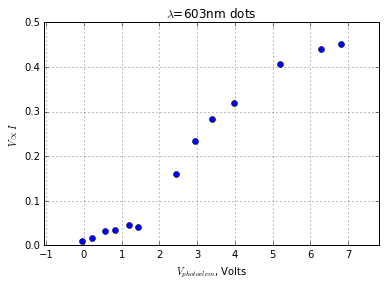

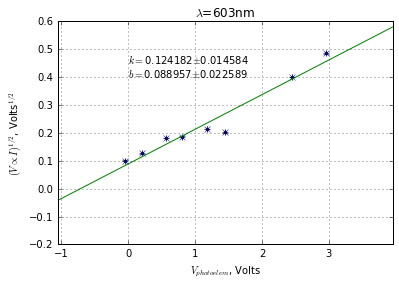

In [10]:
plt.figure(1)
plt.subplot(111)
data = lambda603.values

# calculate polynomial
x = data.T[0] - 0.07
y = data.T[1]

#sugar
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$V \propto I$')
plt.title(u'$\lambda$=603nm dots')
plt.grid(True)

#plot
plt.plot(x,y,'o')
plt.show()


#linear**********
plt.subplot(111)
data = lambda603[5:].values

# calculate polynomial
x = data.T[0] - 0.07
y = np.sqrt(data.T[1])
coef, cov = np.polyfit(x, y, 1, cov=True)
func = np.poly1d(coef)
xerr = np.array([systemerrx for i in np.arange(x.shape[0])])
yerr = np.array([1/(2*y[i])*systemerrx for i in np.arange(y.shape[0])])
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]

# calculate new x's and y's
x_new = np.linspace(x[0]+1, x[-1]-2, 50)
y_new = func(x_new)

#sugar
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='k.')
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$(V \propto I)^{1/2}$, Volts$^{1/2}$')
plt.title(u'$\lambda$=603nm')
plt.grid(True)

#plot
plt.plot(x,y,'x', x_new, y_new)
plt.text(0,0.4,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))  #+\n+'b=$%f$\pm$%f'%(b,berr))
plt.show()

In [11]:
tensions[0].append(2*math.pi*cspeed/(6.03))
tensions[1].append(coef[1]/coef[0])
tensions[2].append(coef[1]/coef[0] * np.sqrt((kerr/coef[0])*(kerr/coef[0]) + (berr/coef[1])*(berr/coef[1])))
coef[1]/coef[0]

0.71634572670073227

In [12]:
lambda589

,"⟨Vфотоэл⟩, В","V ∝ I, В"
0,5.624,0.405
1,4.840,0.369
2,3.972,0.293
3,2.936,0.187
4,2.150,0.126
5,0.690,0.020
6,0.081,0.011
7,0.075,0.009
8,0.070,0.007


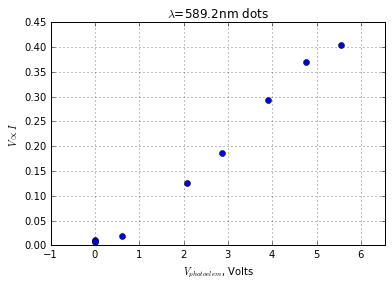

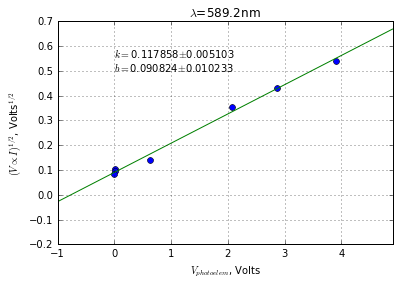

In [13]:
plt.figure(1)
plt.subplot(111)
data = lambda589.values

# calculate polynomial
x = data.T[0] - 0.07
y = data.T[1]

#sugar
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$V \propto I$')
plt.title(u'$\lambda$=589.2nm dots')
plt.grid(True)

#plot
plt.plot(x,y,'o')
plt.show()


#linear**********

data = lambda589[2:].values

# calculate polynomial
x = data.T[0] - 0.07
y = np.sqrt(data.T[1])
coef, cov = np.polyfit(x, y, 1, cov=True)
func = np.poly1d(coef)
xerr = np.array([systemerrx for i in np.arange(x.shape[0])])
yerr = np.array([1/(2*y[i])*systemerrx for i in np.arange(y.shape[0])])
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]

# calculate new x's and y's
x_new = np.linspace(x[0]+1, x[-1]-2, 50)
y_new = func(x_new)

#sugar
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='k.')
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$(V \propto I)^{1/2}$, Volts$^{1/2}$')
plt.title(u'$\lambda$=589.2nm')
plt.grid(True)

#plot
plt.plot(x,y,'o', x_new, y_new)
plt.text(0,0.5,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))
plt.show()

In [14]:
tensions[0].append(2*math.pi*cspeed/(5.892))
tensions[1].append(coef[1]/coef[0])
tensions[2].append(coef[1]/coef[0] * np.sqrt((kerr/coef[0])*(kerr/coef[0]) + (berr/coef[1])*(berr/coef[1])))
coef[1]/coef[0]

0.77062837049885824

In [15]:
lambda585

,"⟨Vфотоэл⟩, В","V ∝ I, В"
0,6.898,0.445
1,5.260,0.397
2,4.625,0.366
3,3.936,0.321
4,3.370,0.266
5,2.921,0.222
6,2.509,0.175
7,1.742,0.111
8,1.165,0.067
9,0.541,0.030


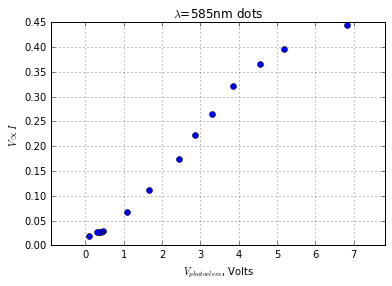

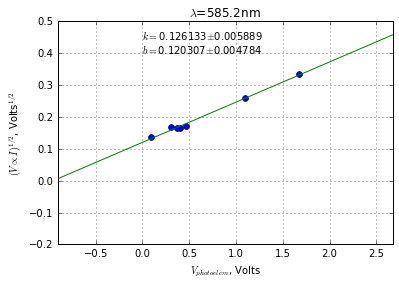

In [16]:
plt.figure(1)
plt.subplot(111)
data = lambda585.values

# calculate polynomial
x = data.T[0] - 0.07
y = data.T[1]

#sugar
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$V \propto I$')
plt.title(u'$\lambda$=585nm dots')
plt.grid(True)

#plot
plt.plot(x,y,'o')
plt.show()


#linear**********

data = lambda585[7:].values

# calculate polynomial
x = data.T[0] - 0.07
y = np.sqrt(data.T[1])
coef, cov = np.polyfit(x, y, 1, cov=True)
func = np.poly1d(coef)
xerr = np.array([systemerrx for i in np.arange(x.shape[0])])
yerr = np.array([1/(2*y[i])*systemerrx for i in np.arange(y.shape[0])])
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]

# calculate new x's and y's
x_new = np.linspace(x[0]+1, x[-1]-2, 50)
y_new = func(x_new)

#sugar
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='k.')
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$(V \propto I)^{1/2}$, Volts$^{1/2}$')
plt.title(u'$\lambda$=585.2nm')
plt.grid(True)

#plot
plt.plot(x,y,'o', x_new, y_new)
plt.text(0,0.4,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))
plt.show()

In [17]:
tensions[0].append(2*math.pi*cspeed/(5.852))
tensions[1].append(coef[1]/coef[0])
tensions[2].append(coef[1]/coef[0] * np.sqrt((kerr/coef[0])*(kerr/coef[0]) + (berr/coef[1])*(berr/coef[1])))
coef[1]/coef[0]

0.95380997093975473

In [18]:
lambda572

,"⟨Vфотоэл⟩, В","V ∝ I, В"
0,6.096,0.405
1,5.142,0.369
2,4.160,0.293
3,3.350,0.187
4,3.025,0.066
5,1.457,0.020
6,0.550,0.011
7,0.323,0.009
8,0.295,0.007


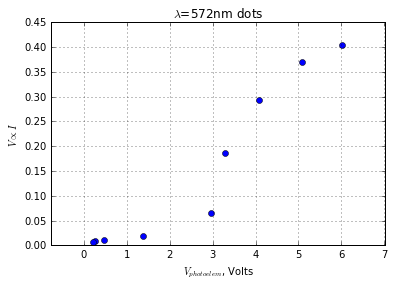

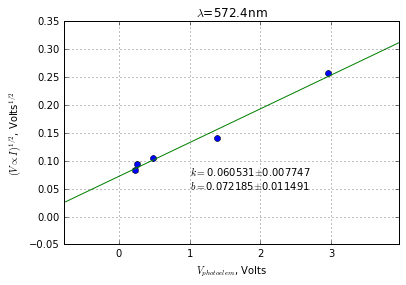

In [19]:
plt.figure(1)
plt.subplot(111)
data = lambda572.values

# calculate polynomial
x = data.T[0] - 0.07
y = data.T[1]

#sugar
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$V \propto I$')
plt.title(u'$\lambda$=572nm dots')
plt.grid(True)

#plot
plt.plot(x,y,'o')
plt.show()


#linear**********

data = lambda572[4:].values

# calculate polynomial
x = data.T[0] - 0.07
y = np.sqrt(data.T[1])
coef, cov = np.polyfit(x, y, 1, cov=True)
func = np.poly1d(coef)
xerr = np.array([systemerrx for i in np.arange(x.shape[0])])
yerr = np.array([1/(2*y[i])*systemerrx for i in np.arange(y.shape[0])])
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]

# calculate new x's and y's
x_new = np.linspace(x[0]+1, x[-1]-2, 50)
y_new = func(x_new)

#sugar
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='k.')
plt.xlim([x[-1]-1, x[0]+1 ])
plt.xlabel(u'$V_{photoelem}$, Volts')
plt.ylabel(u'$(V \propto I)^{1/2}$, Volts$^{1/2}$')
plt.title(u'$\lambda$=572.4nm')
plt.grid(True)

#plot
plt.plot(x,y,'o', x_new, y_new)
plt.text(1,0.05,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))
plt.show()

In [20]:
tensions[0].append(2*math.pi*cspeed/(5.724))
tensions[1].append(coef[1]/coef[0])
tensions[2].append(coef[1]/coef[0] * np.sqrt((kerr/coef[0])*(kerr/coef[0]) + (berr/coef[1])*(berr/coef[1])))
coef[1]/coef[0]

1.1925332574531347

In [22]:
tensData = pd.DataFrame(tensions).T
tensData.columns = ["$\omega$, 1/c * $10^{-15}$", "$V_{0}$, Volt", "$\sigma_{V_{0}}$"]
tensData

,"$\omega$, 1/c * $10^{-15}$","$V_{0}$, Volt",$\sigma_{V_{0}}$
0,3.123800,0.716346,0.200419
1,3.196965,0.770628,0.093013
2,3.218817,0.953810,0.058494
3,3.290796,1.192533,0.243579


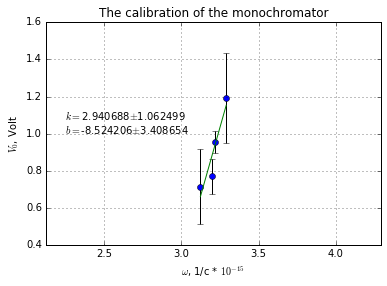

In [23]:
plt.figure(1)
weights = [1.0, 1.0, 1.0, 1.0, sys.float_info.epsilon]
# calculate polynomial
x = tensions[0]
y = tensions[1]
x_extra = x + x[-1:]
y_extra = y + y[-1:]
coef,cov = np.polyfit(x_extra, y_extra, 1, w=weights,cov=True)
func = np.poly1d(coef)
kerr, berr = np.sqrt(np.diag(cov))[0], np.sqrt(np.diag(cov))[1]
k,b = coef[0], coef[1]

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 100)
y_new = func(x_new)

#sugar
plt.errorbar(x, y, yerr=tensions[2], fmt='k.')
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.xlabel(u'$\omega$, 1/c * $10^{-15}$')
plt.ylabel(u'$V_{0}$, Volt')
plt.title(u'The calibration of the monochromator')
plt.grid(True)

#plot
plt.plot(x,y,'o', x_new, y_new)
plt.text(2.25, 1.0,r'$k=$%f$\pm$%f'%(k,kerr)+'\n'+r'$b=$%f$\pm$%f'%(b,berr))
plt.show()

In [24]:
plunk = coef[0]/1.6
err = plunk * np.sqrt((kerr/k)*(kerr/k) + (berr/b)*(berr/b))
print str(plunk) + u'±' + str(err)

1.83793011025±0.99052025206


### Вывод
Полученная постоянная Планка совпадает по порядку величины, и погрешность покрывает значение из справочников